In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read ipl.csv file and print first 5 records
df = pd.read_csv("ipl data.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#check total number of columns,entries note down your findings
df.info()
#Findings:-This dataset contains total 18 columns & 636 entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [4]:
# find null values 
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
#drop umpire3 column as it contains more than 75% of null values
df.drop("umpire3",axis=1,inplace=True)

In [9]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column
df.dropna(inplace=True)
df.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

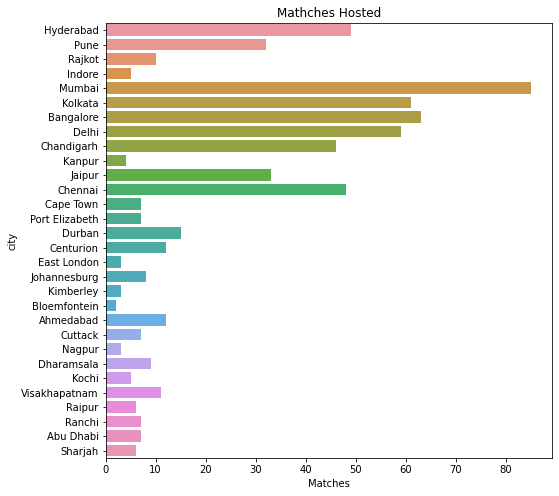

In [21]:
#which city hosted most number of matches?
#draw bar plot and write down your insights
plt.figure(figsize=(8,8))
sns.countplot(data=df,y="city")
plt.title("Mathches Hosted")
plt.xlabel("Matches")
plt.show()
#mumbai hosted the most no of matches
#80 plus matches were hosted in mumbai

In [28]:
#find all venue of mumbai city
df.groupby('city').get_group('Mumbai')['venue'].value_counts()

Wankhede Stadium              57
Dr DY Patil Sports Academy    17
Brabourne Stadium             11
Name: venue, dtype: int64

<AxesSubplot:>

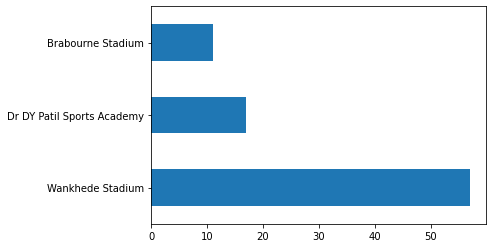

In [32]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)
df.groupby('city').get_group('Mumbai')['venue'].value_counts().plot(kind='barh')
# From Analysis and bar graph visualization it is seen that Wankhede Stadium Hosted Maximum Number of Matches 57, 
# Dr DY Patil Sports Academy hosted 17 Matches and Brabourne Stadium Hosted 11 Matches

In [35]:
#what is the preferred choice after winning a toss in mumbai
df.groupby('city').get_group('Mumbai')['toss_decision'].value_counts()
# preffered choice is to field 1st

field    51
bat      34
Name: toss_decision, dtype: int64

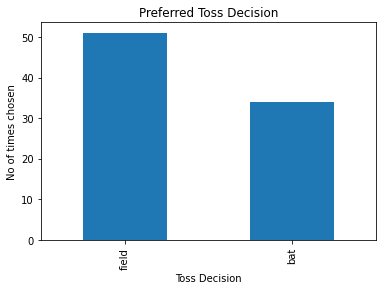

In [42]:
#graphical representation of above question
df[df["city"]=="Mumbai"]["toss_decision"].value_counts().plot(kind='bar')
plt.xlabel('Toss Decision')
plt.ylabel('No of times chosen')
plt.title('Preferred Toss Decision')
plt.show()

In [44]:
#which team won most number of toss :-Mumbai Indians
df["toss_winner"].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

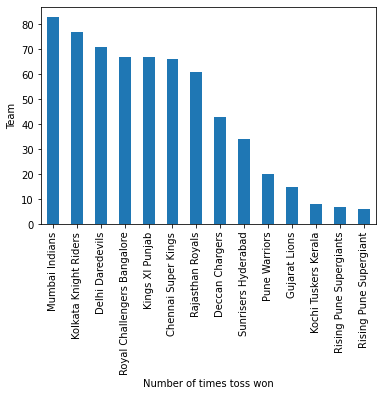

In [48]:
#show graphical representation of above question
df["toss_winner"].value_counts().plot(kind='bar')
plt.xlabel('Number of times toss won')
plt.ylabel('Team')
plt.show()

In [50]:
#find what mumbai indians preferred after winning a toss?
df[df["toss_winner"] == "Mumbai Indians"]["toss_decision"].value_counts()
# mumbai indians preffered to field first

field    44
bat      39
Name: toss_decision, dtype: int64

In [86]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings
df[((df['team1'] == 'Mumbai Indians') & (df['team2'] == 'Chennai Super Kings')) |
   (df['team2'] == 'Mumbai Indians') & (df['team1'] == 'Chennai Super Kings')
    & (df['team1'] == 'Chennai Super Kings')].winner.value_counts()

Mumbai Indians         12
Chennai Super Kings     9
Name: winner, dtype: int64

In [53]:
#Which team won most of the matches in mumbai?
df[df["city"]=="Mumbai"]["winner"].value_counts().head()
# mumbai won 45 matches

Mumbai Indians                 45
Chennai Super Kings             8
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Rajasthan Royals                5
Name: winner, dtype: int64

In [59]:
#how many times each team won the toss and won the match in mumbai
df[(df["city"]=="Mumbai") & (df["winner"] == df["toss_winner"])].groupby("winner").size().sort_values(ascending=False)

winner
Mumbai Indians                 26
Chennai Super Kings             5
Deccan Chargers                 3
Delhi Daredevils                2
Rajasthan Royals                2
Royal Challengers Bangalore     2
Gujarat Lions                   1
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
dtype: int64

In [64]:
#which venue hosted most number of matches
df['venue'].value_counts().head()

M Chinnaswamy Stadium                        63
Eden Gardens                                 61
Feroz Shah Kotla                             59
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

In [72]:
#find how many matches chennai super kings played at M Chinnaswamy stadium?
df[(df["team1"] == "Chennai Super Kings" ) & (df["venue"] == "M Chinnaswamy Stadium") | 
   (df["team2"] == "Chennai Super Kings" ) & (df["venue"] == "M Chinnaswamy Stadium")].shape[0]

7

In [78]:
#who won most matches at M Chinnaswamy stadium?--Royal Challengers Bangalore
df[df["venue"]=="M Chinnaswamy Stadium"].groupby("winner").size().sort_values(ascending=False).idxmax()

'Royal Challengers Bangalore'

In [79]:
#matches played in each year
df[["id","season"]].groupby("season").count()

,id
season,
2008,58
2009,57
2010,60
2011,72
2012,74
2013,76
2014,53
2015,57
2016,60


In [82]:
#which city hosted most number of matches in 2013 
df[df["season"]==2013].groupby("city").size().sort_values(ascending=False)

city
Bangalore     8
Chennai       8
Delhi         8
Hyderabad     8
Jaipur        8
Kolkata       8
Mumbai        8
Pune          8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
dtype: int64

In [83]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)
df_2013 = df.groupby('season').get_group(2013)
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 381 to 456
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               76 non-null     int64 
 1   season           76 non-null     int64 
 2   city             76 non-null     object
 3   date             76 non-null     object
 4   team1            76 non-null     object
 5   team2            76 non-null     object
 6   toss_winner      76 non-null     object
 7   toss_decision    76 non-null     object
 8   result           76 non-null     object
 9   dl_applied       76 non-null     int64 
 10  winner           76 non-null     object
 11  win_by_runs      76 non-null     int64 
 12  win_by_wickets   76 non-null     int64 
 13  player_of_match  76 non-null     object
 14  venue            76 non-null     object
 15  umpire1          76 non-null     object
 16  umpire2          76 non-null     object
dtypes: int64(5), object(12)
memory usa